In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import sys, os

matplotlib.rcParams.update({'font.size': 14})

In [3]:
sys.path.append("../../src/")
import bfzi
from bfzi.helpers import *
from bfzi.linear_instability import *

## Example of nongeostrophic linear stability calculation for idealized bottom frontal zones

In [7]:
Ri = 10 # gradient Richardson number
M = calc_M_from_Ri(Ri, N, f, θ) # strength of bottom frontal zone (sqrt of horizontal buoyancy gradient)
k = 0. # cross-slope 4wavenumber (l=0 isolates fastest growing baroclinic mode)

# Know from sensitivity experiment that this is roughly the fastest growing mode
l = 3.5e-4 * 2*np.pi # along-slope wavenumber (rad/m)

# Setup and solve eigenvalue problem for bottom frontal zone linear instability
nz = 128
ds = bottom_frontal_zone_instability(k, l, M, κ0=0.e-7, κ1=0., nz=nz)
ds_hi = bottom_frontal_zone_instability(k, l, M, κ0=0.e-7, κ1=0., nz=np.int64(1.25*nz))

2022-07-05 10:47:36,129 subsystems 0/1 INFO :: Building subproblem matrices 1/1 (~100%) Elapsed: 1s, Remaining: 0s, Rate: 9.1e-01/s
2022-07-05 10:47:48,159 subsystems 0/1 INFO :: Building subproblem matrices 1/1 (~100%) Elapsed: 1s, Remaining: 0s, Rate: 8.1e-01/s


/var/folders/_7/54nm1vyx6gg9l5f555w0c1tc0000gn/T/ipykernel_76682/2314056440.py:10: RuntimeWarning: divide by zero encountered in true_divide
  deltas = np.abs(gr[::-1][:n] - gr_hi[::-1][:n]) / sigmas
/var/folders/_7/54nm1vyx6gg9l5f555w0c1tc0000gn/T/ipykernel_76682/2314056440.py:10: RuntimeWarning: invalid value encountered in true_divide
  deltas = np.abs(gr[::-1][:n] - gr_hi[::-1][:n]) / sigmas
/var/folders/_7/54nm1vyx6gg9l5f555w0c1tc0000gn/T/ipykernel_76682/2314056440.py:20: RuntimeWarning: divide by zero encountered in true_divide
  plt.plot(np.sort(1/deltas)[::-1], ".")


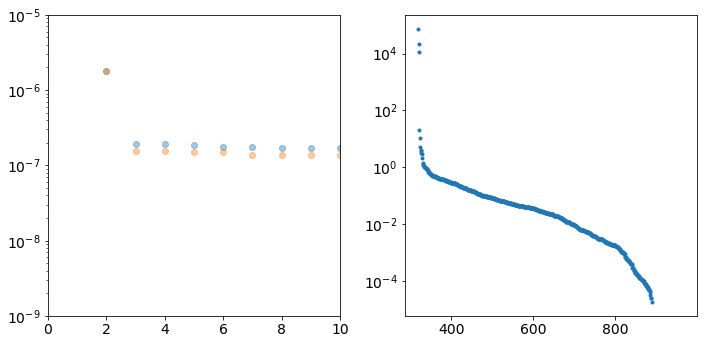

In [8]:
plt.figure(figsize=(10, 5))
gr = np.sort(ds['omega'].imag)[::-1]
gr_hi = np.sort(ds_hi['omega'].imag)[::-1]
n = len(gr)

sigmas = np.zeros(n)
sigmas[0] = np.abs(np.diff(gr))[0]
sigmas[1:-1] = [0.5*(np.abs(gr[j] - gr[j - 1]) + np.abs(gr[j + 1] - gr[j])) for j in range(1, n-1)]
sigmas[-1] = np.abs(np.diff(np.sort(gr)))[-1]
deltas = np.abs(gr[::-1][:n] - gr_hi[::-1][:n]) / sigmas

plt.subplot(1,2,1)
plt.plot(gr, "o", alpha=0.4)
plt.plot(gr_hi, "o", alpha=0.4)
plt.yscale("log")
plt.ylim(1e-9, 1e-5)
plt.xlim(0, 10)

plt.subplot(1,2,2)
plt.plot(np.sort(1/deltas)[::-1], ".")
plt.yscale("log")
plt.tight_layout()

In [9]:
gr[0], gr_hi[0]

(3.481812429251165e-05, 3.481841227731924e-05)